In [1]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *

# All Lennard-Jones calculators
- ASE
- JAX-MD Pair

JAX-MD Neighbor List omitted. Initial neighbor list construction in warm-up still TODO.

In [2]:
results = load_results_from_pickle("../results/100_runs_ase_fixed/results_100_runs.pickle")

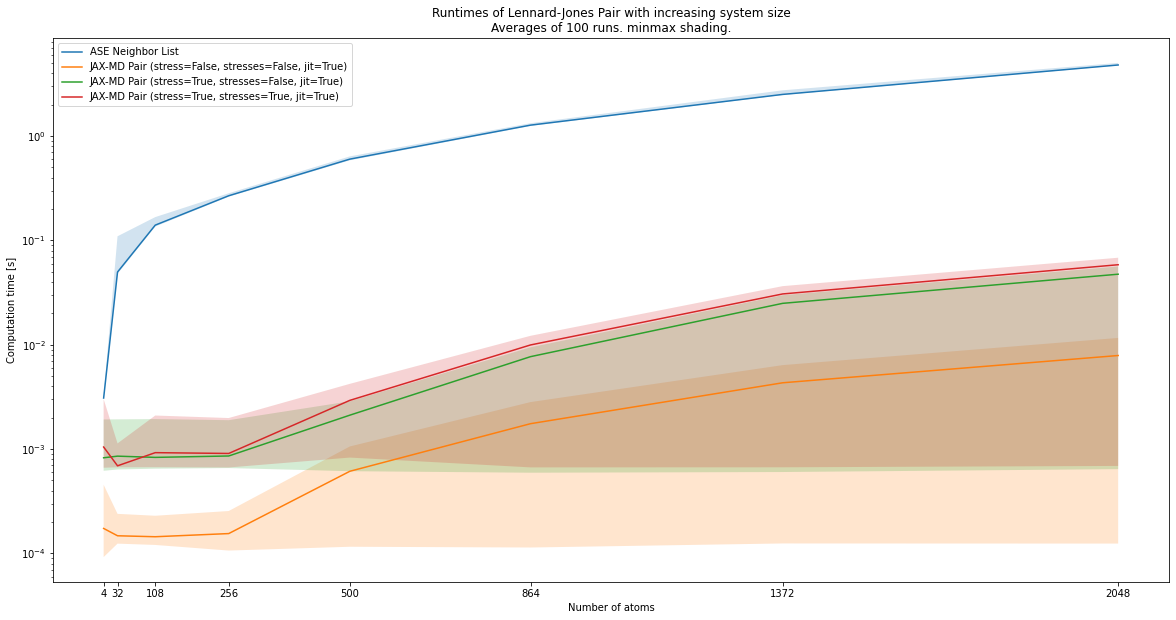

In [3]:
plot_runtimes(results=results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              shade_by='minmax')

## Only slow calculators

i.e. ASE and JAX-MD with `jit=False`.

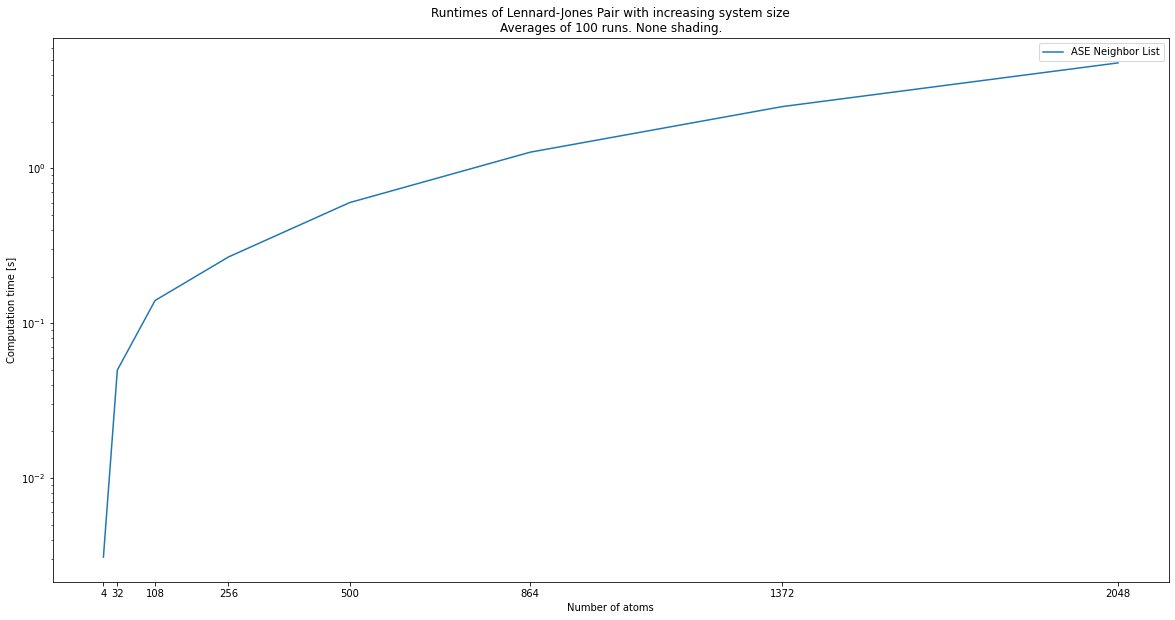

In [4]:
slow_results = list(filter(lambda r: "jit=True" not in r.calculator.description, results))
# slow_results = list(filter(lambda r: "ASE Neighbor List" not in r.calculator.description, slow_results))

plot_runtimes(results=slow_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size')

# do this with more than 2048 atoms
# maybe without ASE intialization, smoother system size increase

# for same with neighbor lists, maybe initialize w/ FHI-Vibes

## Only fast calculators

i.e. JAX-MD with `jit=True`.

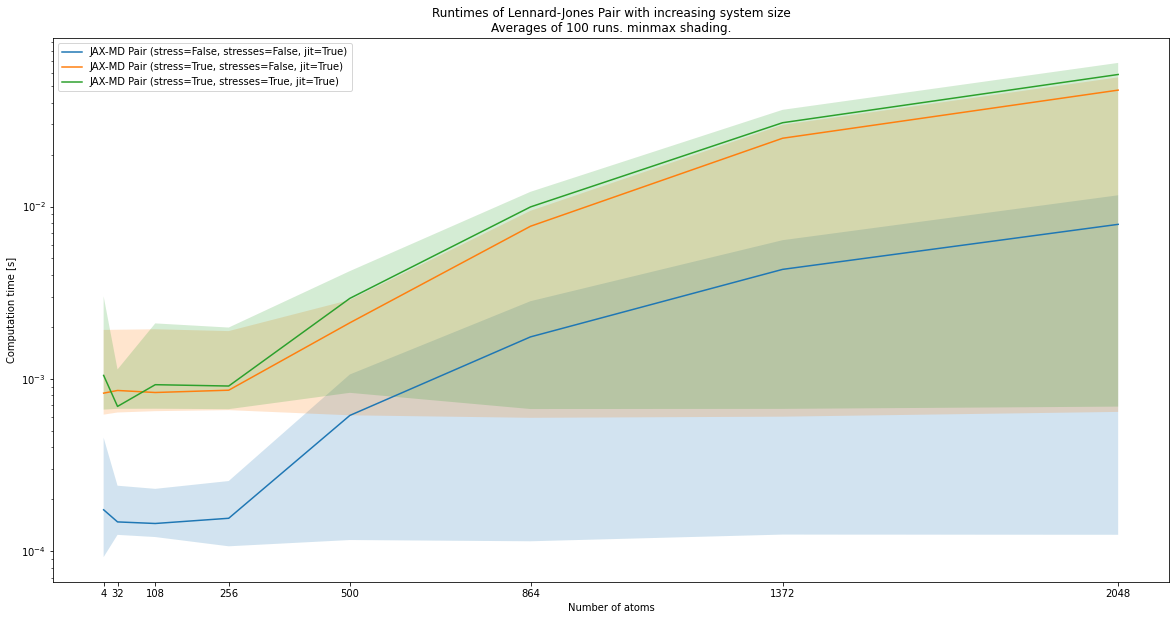

In [5]:
fast_results = list(filter(lambda r: "jit=False" not in r.calculator.description, results))
fast_results = list(filter(lambda r: "ASE" not in r.calculator.description, fast_results))

plot_runtimes(results=fast_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              shade_by='minmax')

## Runtime fluctuations and caching
- Investigating JAX-MD with `jit=True`, `stress=True`, `stresses=True`
- Scatter results of each run
- Between runs, we don't change the system at all. So, caching would be possible.
- Large fluctuations but mean looks good.

But: what causes runtime variance?*

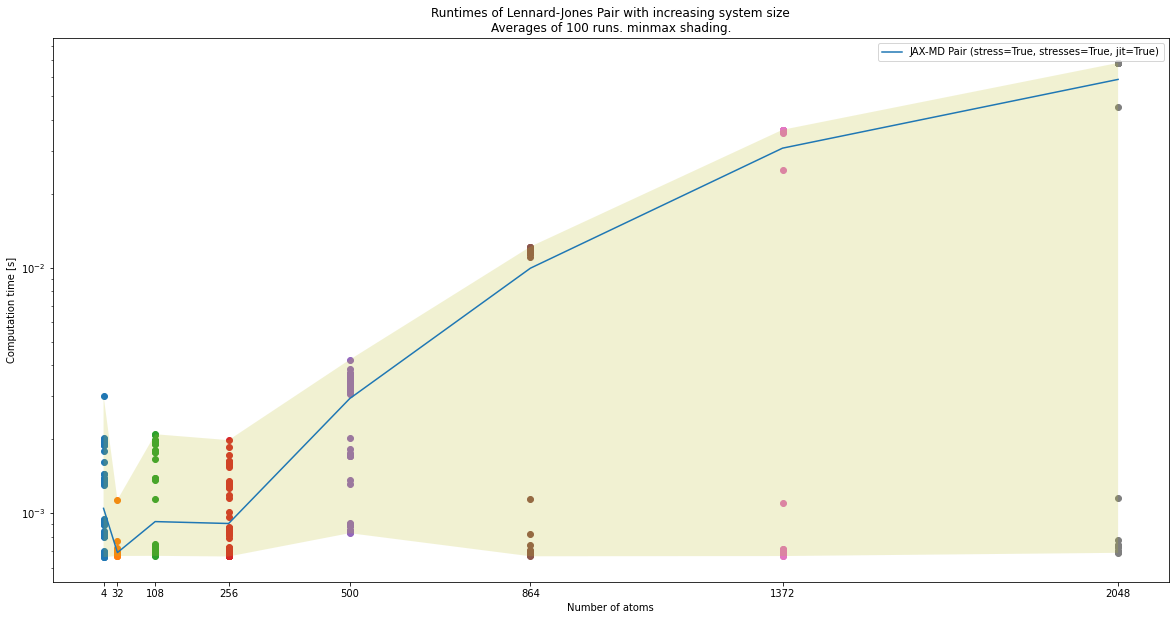

In [6]:
filtered_results = list(filter(lambda r: "jit=True" in r.calculator.description, results))
filtered_results = list(filter(lambda r: "stress=True" in r.calculator.description, filtered_results))
filtered_results = list(filter(lambda r: "stresses=True" in r.calculator.description, filtered_results))

plot_runtimes(results=filtered_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              scatter=True,
              shade_by='minmax')

### Runtime per system size
(Same calculator as previous plot)

- For a single calculator: Per system size, plot the runtime over its indices.
- We perform the same computation repeatedly, so runtime should be pretty constant.
- Caching mechanisms would likely cause a consistent drop after initial computations.

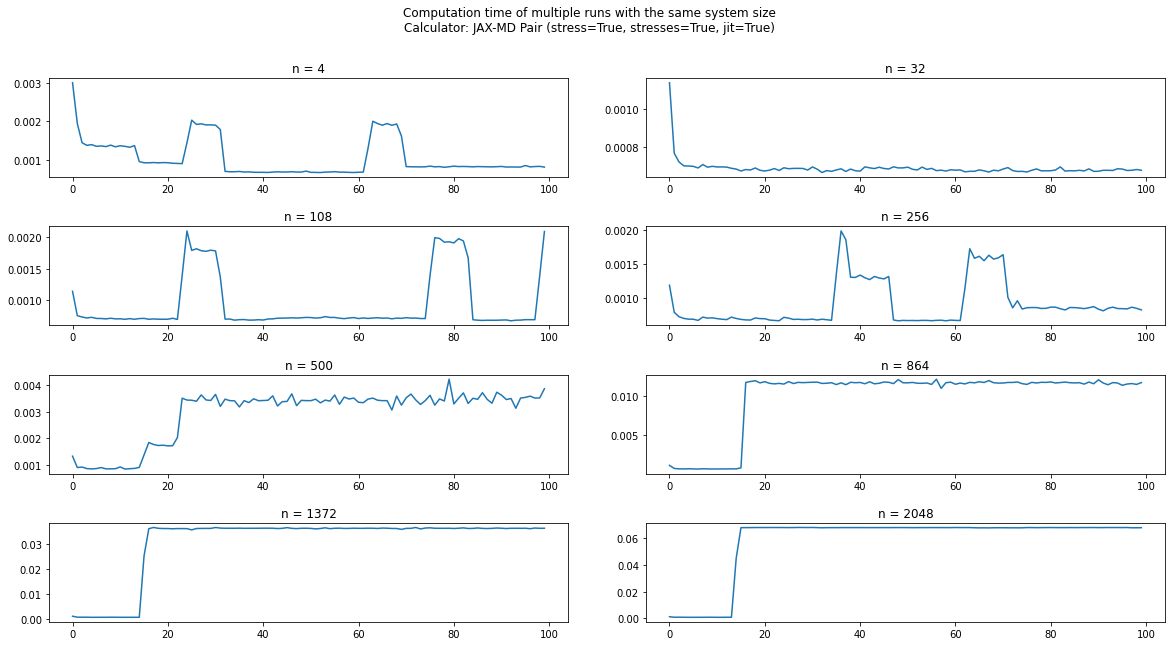

In [7]:
description = "JAX-MD Pair (stress=True, stresses=True, jit=True)"
# description = "ASE Neighbor List"
single_calculator_results = list(filter(lambda r: r.calculator.description == description, results))
plot_runtime_variances(single_calculator_results)

**Is this a time measurement issue?**
- `time.time()`, `time.monotonic()` and `time.perf_counter()` all produce similar results.
- Downsides of last two: Fractional measurements. Less relatable and interpretable.

In [1]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *

{<XlaMemoryFlag.DEFAULT: 'DEFAULT'>, <XlaMemoryFlag.XLA_PYTHON_CLIENT_ALLOCATOR: 'XLA_PYTHON_CLIENT_ALLOCATOR'>}
yep


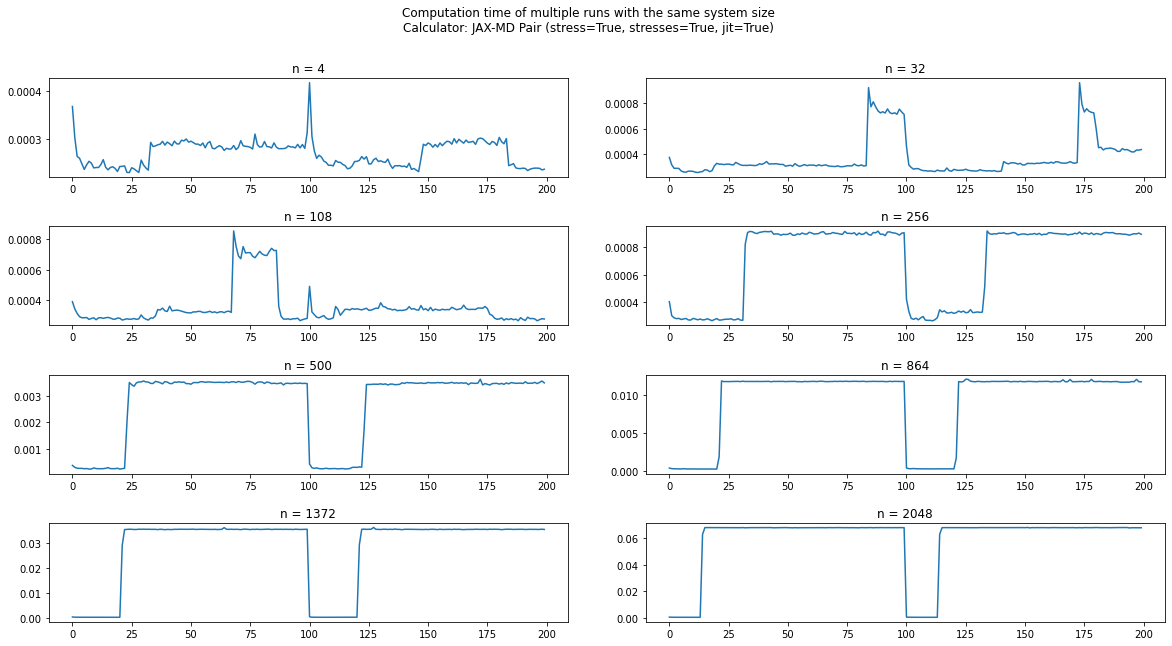

In [2]:
old_results = load_results_from_pickle("../results/memory_modes_100_runs/results_memory_modes_100_runs.pickle")
description = "JAX-MD Pair (stress=True, stresses=True, jit=True)"
single_calculator_results = list(filter(lambda r: r.calculator.description == description, old_results))

plot_runtime_variances(single_calculator_results)